In [2]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def option(N,S0,u,d,R,payoff,exercise_style='eur'):
    #print(exercise_style)
    nn = np.arange(0,N+1) # 0, 1, ... , N
    #print(nn)
    x0 = np.log(S0)
    U = np.log(u); D = np.log(d)
    x = x0 + (N-nn)*D + nn*U
    S = np.exp(x)
    #print(S)
    V =  [payoff(S)] # option values at the final time
    #print(V)
    q = (1+R-d)/(u-d) # risk-neutral probability
    for m in range(N):
        nn = nn[:-1] # tuncate nn
        # V[m] is the array of option values at the future time
        tmpV = (1/(1+R))*(q*V[m][1+nn]+(1-q)*V[m][nn]) # continuation value
        S = S[:-1]/d # array of asset values
        if exercise_style=='am':
            tmpV = np.maximum(tmpV,payoff(S))
        V.append(tmpV)
    #for m in range(N+1):
    #    print(V[m][:])
    return V

In [4]:
K = 10
payoff = lambda S: np.maximum(K-S,0)
S0=10
T = 1
mu = 0.1
sigma = 0.5
r = 0.02

In [5]:
# alternatively,we can specify u, d, and R directly
u=1.1
d=1/u
R=0.0
V = option(1,S0,u,d,R,payoff,'eur')
print(V)

[array([ 0.90909091,  0.        ]), array([ 0.47619048])]


In [8]:
VV = []
for N in range(1,1000,2):
    dt = T/N
    R = np.exp(r*dt)-1
    u = np.exp(r*dt+sigma*np.sqrt(dt))
    d = np.exp(r*dt-sigma*np.sqrt(dt))
    V = option(N,S0,u,d,R,payoff,'eur')
    VV.append(V[N][0]) # V[N][0] is the value at the root node 


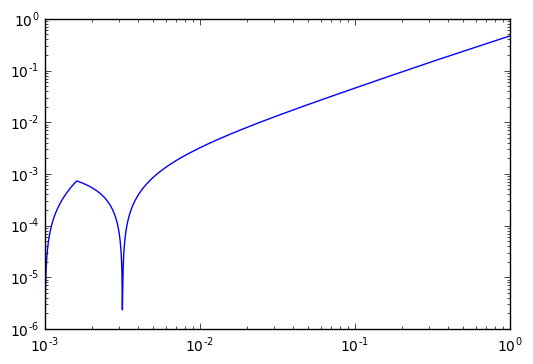

In [10]:
dt = T/arange(1,1000,2)
plot(dt,np.abs(VV[-1]-VV));
yscale('log');xscale('log')

## Exercises:
 - Compare the European option values being calculated with the Black-Scholes value (instead of the final computed value, which is what the current code does) and investigate the convergence behaviour as N increases.
 - Add a timer to the code so you can measure how the time taken depends on N.
 - Repeat this with different prescriptions for u and d. Do your trees converge to the same value?
 - Compare the European and American option values for puts and for calls. 
 - Modify the code to included dividends and repeat this comparison.
 - Add the capability of recording the exercise decisions at each node in the American case.